TWITTER SENTIMENT ANALYSIS

In [44]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [45]:
# 1.Load the datasets
train_df = pd.read_csv("twitter_training.csv", sep="\t", header=None, quoting=3, on_bad_lines="skip")
valid_df = pd.read_csv("twitter_validation.csv", sep="\t", header=None, quoting=3, on_bad_lines="skip")

In [46]:
# 2.Rename the columns
train_df.columns = ["id", "topic", "sentiment", "tweet"] 
valid_df.columns = ["id", "topic", "sentiment", "tweet"]

In [47]:
# 3. Drop rows with missing tweets
train_df.dropna(subset=["tweet"], inplace=True)
valid_df.dropna(subset=["tweet"], inplace=True)

In [48]:
train_df["clean_tweet"] = train_df["tweet"].apply(
    lambda text: re.sub(r"\s+", " ", 
                 re.sub(r"[^a-z\s]", " ", 
                 re.sub(r"#\w+|@\w+|http\S+|www\S+", "", 
                 str(text).lower()))).strip())

valid_df["clean_tweet"] = valid_df["tweet"].apply(
    lambda text: re.sub(r"\s+", " ", 
                 re.sub(r"[^a-z\s]", " ", 
                 re.sub(r"#\w+|@\w+|http\S+|www\S+", "", 
                 str(text).lower()))).strip())

print(train_df[["tweet", "clean_tweet"]].head())


                                               tweet  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                                         clean_tweet  
0  im getting on borderlands and i will murder yo...  
1  i am coming to the borders and i will kill you...  
2  im getting on borderlands and i will kill you all  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands and i will murder yo...  


In [49]:
# 4. Features (X) and Labels (y)
X_train, y_train = train_df["tweet"], train_df["sentiment"]
X_valid, y_valid = valid_df["tweet"], valid_df["sentiment"]

In [50]:
# 5. TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_valid_tfidf = tfidf.transform(X_valid)

In [51]:
# 6. Train Model (DecisionTreeClassifier)
model = MultinomialNB(alpha=0.5)  
model.fit(X_train_tfidf, y_train)


MultinomialNB(alpha=0.5)

In [52]:
# Predict on validation/test set
y_pred = model.predict(X_valid_tfidf)

In [ ]:
# 7. Evaluate on Validation Set
print("Accuracy:", accuracy_score(y_valid, y_pred))
print("F1 Score:", f1_score(y_valid, y_pred, average="weighted"))
print("\nClassification Report:\n", classification_report(y_valid, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_valid, y_pred))

Accuracy: 0.659
F1 Score: 0.6507564775882633

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.80      0.44      0.57       172
    Negative       0.59      0.81      0.68       266
     Neutral       0.73      0.52      0.61       285
    Positive       0.65      0.79      0.71       277

    accuracy                           0.66      1000
   macro avg       0.69      0.64      0.64      1000
weighted avg       0.68      0.66      0.65      1000


Confusion Matrix:
 [[ 76  44  13  39]
 [  3 215  19  29]
 [ 12  72 149  52]
 [  4  32  22 219]]


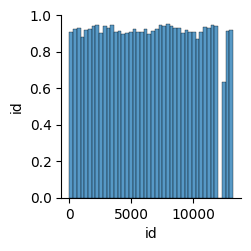

In [54]:
# Visualize data
sns.pairplot(train_df),(valid_df)
plt.show()
